####Name:Manohar Goud
##Roll No:21X05A6706
##Branch:lV year cse(data science)
##College:Narsimha Reddy Engineering College

##project title:Analysis and prediction of creditcard.csv


##project statement: There are so many frauds which is going on  the scoiety by credit card.By collecting the data and making effiecient analysis and classifying the fradulent transactions and valid transactions


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(7973, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,...,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,...,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,...,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,...,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,...,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


In [ ]:
#knowing abiut the data

In [ ]:
fraud=df[df['Class']==1]
print(fraud)

      Time        V1        V2        V3        V4        V5        V6  \
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
6331  7526  0.008430  4.137837 -6.240697  6.675732  0.768307 -3.353060   
6334  7535  0.026779  4.132464 -6.560600  6.348557  1.329666 -2.513479   
6336  7543  0.329594  3.712889 -5.775935  6.078266  1.667359 -2.420168   
6338  7551  0.316459  3.809076 -5.615159  6.047445  1.554026 -2.651353   
6427  7610  0.725646  2.300894 -5.329976  4.007683 -1.730411 -1.732193   
6446  7672  0.702710  2.426433 -5.234513  4.416661 -2.170806 -2.667554   
6472  7740  1.023874  2.001485 -4.769752  3.819195 -1.271754 -1.734662   
6529  7891 -1.585505  3.261585 -4.1374

In [ ]:
valid=df[df['Class']==0]
print(valid)

       Time        V1        V2        V3        V4        V5        V6  \
0         0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1         0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2         1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3         1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4         2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...     ...       ...       ...       ...       ...       ...       ...   
7967  10980 -0.046786  0.030050  2.037794 -0.670130 -0.727283 -0.588537   
7968  10980  1.284388 -0.013181  0.646174  0.198985 -0.568675 -0.526121   
7969  10981  1.190428 -0.122329  0.954945  0.267101 -0.971026 -0.652279   
7970  10981 -0.725175  0.298202  1.824761 -2.587170  0.283605 -0.016617   
7971  10981  1.226153 -0.129645  0.735197  0.142752 -0.703245 -0.349641   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  

In [ ]:
outliers=len(fraud)/len(valid)
print(outliers/100)

3.1458411979363285e-05


In [ ]:
print('fraud cases are',len(fraud))

fraud cases are 25


In [ ]:
print('successful valid transactions are',len(valid))

successful valid transactions are 7947


In [ ]:
#amount for fraud cases

In [ ]:
fraud.Amount.describe()

count      25.000000
mean      106.308400
std       372.676883
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
#amount fo valid transaction cases

In [ ]:
valid.Amount.describe()

count    7947.000000
mean       65.284891
std       194.126547
min         0.000000
25%         4.795000
50%        15.950000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
#knowing the correlation of the  features in the dataset

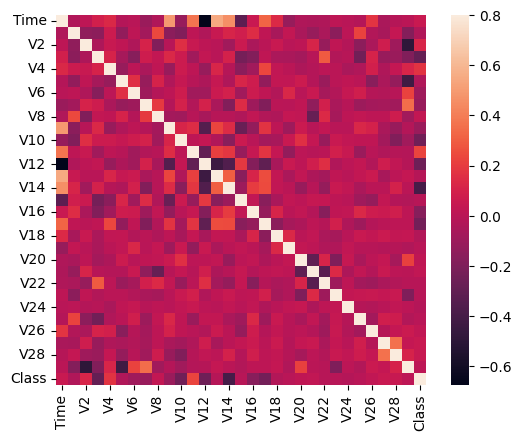

In [ ]:
corr=df.corr()
sns.heatmap(corr,vmax=.8,square=True)
plt.show()

In [25]:
#checking whether the columns consists of null values are not

In [27]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

null values are present in the dataset hence it effects the accuracy score of the model and model may performs very poor hence cleaning of dataset is very mandatory for the dataset.removing the null values from the dataset to to train the model well and apply the suitable model for it

In [28]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()# no more null values are present in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [31]:
#separating the x and y values to train and test the dataset and to apply the randomforestclassifier

In [32]:
x=df.drop(['Class'],axis=1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,10980,-0.046786,0.030050,2.037794,-0.670130,-0.727283,-0.588537,-0.067966,-0.370767,0.228931,...,0.322583,0.264364,1.078896,-0.097768,0.375679,-0.500253,-0.159051,-0.018267,-0.061794,39.00
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.063281,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.150267,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.001388,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95


In [33]:
x.shape

(7972, 30)

In [35]:
y=df['Class']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7967    0.0
7968    0.0
7969    0.0
7970    0.0
7971    0.0
Name: Class, Length: 7972, dtype: float64

In [36]:
y.shape

(7972,)

it does not take any columns for p training and testing the data so we are only taking values without taking columns

In [37]:
x1=x.values
x1

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.09810000e+04,  1.19042824e+00, -1.22329144e-01, ...,
        -1.00188315e-01, -4.77439733e-03,  1.49500000e+01],
       [ 1.09810000e+04, -7.25174766e-01,  2.98202350e-01, ...,
        -3.11419393e-02,  2.55638666e-02,  1.29500000e+01],
       [ 1.09810000e+04,  1.22615304e+00, -1.29645121e-01, ...,
        -1.00081361e-01, -9.86920840e-03,  1.59500000e+01]])

In [39]:
y1=y.values
y1

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
# training and testing the dataset

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [42]:
print(x_train)

[[ 1.17900000e+03  6.57389339e-01 -6.43789396e-01 ...  1.14239002e-02
   7.49778628e-02  2.51350000e+02]
 [ 1.88000000e+02  1.16843339e+00  3.19977589e-01 ...  2.18927266e-02
   1.93366400e-02  8.09000000e+00]
 [ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 ...
 [ 6.54000000e+02 -8.33568321e-01  6.06174188e-01 ...  1.64383985e-01
   2.74361005e-01  9.90000000e+00]
 [ 1.05180000e+04 -2.26083429e+00 -7.58476478e-01 ...  2.49838190e-01
  -5.77953345e-03  9.50000000e-01]
 [ 9.67300000e+03 -1.61547335e+00  1.50325911e+00 ... -1.11060384e+00
   1.15793236e-01  2.99900000e+01]]


In [43]:
print(x_test)


[[ 5.75300000e+03 -1.12863936e+00  1.24763953e+00 ...  1.82763452e-01
   1.07998112e-01  5.90000000e+00]
 [ 4.69000000e+03 -1.30060458e+00  5.98826086e-01 ... -8.28637702e-01
  -9.99499308e-02  1.56900000e+01]
 [ 2.94200000e+03 -4.55381586e-01  4.65230036e-01 ...  4.40550611e-03
  -5.23812598e-02  9.48000000e+01]
 ...
 [ 7.58000000e+03  1.13427464e+00  2.42404189e-01 ... -3.27342627e-03
   1.71692354e-02  3.60000000e+01]
 [ 9.82800000e+03 -9.96630171e-01  1.16049279e+00 ...  1.09208486e-01
   1.03158112e-01  8.76000000e+00]
 [ 4.43700000e+03  1.28067328e+00  1.21095747e-01 ...  4.90805040e-06
   4.75607379e-03  1.00000000e+00]]


In [44]:
print(y_train)

[0. 0. 0. ... 0. 0. 0.]


In [45]:
print(y_test)

[0. 0. 0. ... 0. 0. 0.]


##MODEL BUILDING

In [46]:
rfc=RandomForestClassifier()

In [47]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

##PREDICTING

In [48]:
y_pred=rfc.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


##ACCURACY SCORE , PREICISION,RECALL SCORE

In [51]:
accuracy=accuracy_score(y_test,y_pred)
print('ACCURACY SCORE IS {}'.format(accuracy))

ACCURACY SCORE IS 1.0


In [55]:
precision=precision_score(y_test,y_pred)
print('the precision score is {}'.format(precision))

the precision score is 1.0


In [56]:
recall=recall_score(y_test,y_pred)
print('the recall score is {}'.format(recall))

the recall score is 1.0


##CONFUSION MATRIX

In [60]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1592,    0],
       [   0,    3]])

In [61]:
#visualizing the confusion matrix

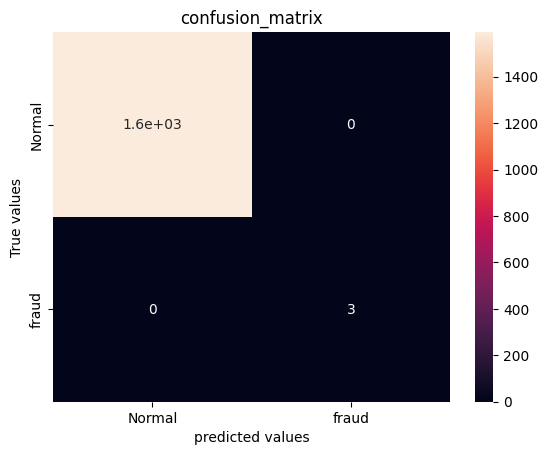

In [63]:
labels=['Normal','fraud']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True)
plt.title('confusion_matrix')
plt.ylabel('True values')
plt.xlabel('predicted values')
plt.show()

##conclusion:Credit card fraud is a serious issue that can lead to financial loss and identity theft. It is a type of fraud committed using a payment card, such as a credit card or debit card. The purpose may be to obtain goods or services or to make payment to another account, which is controlled by a criminals. Credit card fraud can occur when unauthorized users gain access to an individual’s credit card information in order to make purchases, other transactions, or open new accounts 1. There are various techniques used for credit card frauds such as paper-based fraud, application fraud, financial fraud, skimming to commit fraud, etc2. To detect credit card fraud, refer to the sources mentioned in the results